In [ ]:
# Mounting with Drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import numpy as np
import pandas as pd
import tensorflow as  tf
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers

In [2]:
# Importing Data and Reshaping

train_x_data = pd.read_csv("/content/drive/My Drive/8th_Sem_Internship/Printed/Aa/X_train.csv")
test_x_data = pd.read_csv("/content/drive/My Drive/8th_Sem_Internship/Printed/Aa/X_test.csv")
train_y_data = pd.read_csv("/content/drive/My Drive/8th_Sem_Internship/Printed/Aa/Y_train.csv")
test_y_data = pd.read_csv("/content/drive/My Drive/8th_Sem_Internship/Printed/Aa/Y_test.csv")

IMG_SIZE = 32

# X-train
read = train_x_data.iloc[:,:].values
x_train = np.array(read)
x_train = read.reshape(np.shape(x_train)[0],IMG_SIZE,IMG_SIZE,3)

# X-test
read = test_x_data.iloc[:,:].values
x_test = np.array(read)
x_test = read.reshape(np.shape(x_test)[0],IMG_SIZE,IMG_SIZE,3)

# Y-train
read = train_y_data.iloc[:,:].values
y_train = np.array(read)
y_train = read.reshape(np.shape(y_train)[0],)

# Y-test
read = test_y_data.iloc[:,:].values
y_test = np.array(read)
y_test = read.reshape(np.shape(y_test)[0],)

X_train = x_train.astype('float32')
X_test = x_test.astype('float32')
Y_train = y_train.astype('float32')
Y_test = y_test.astype('float32')

X_train /= 255.0
X_test /= 255.0

print("X-Train Shape : ", np.shape(X_train))
print("Y-Train Shape : ", np.shape(Y_train))
print("X-Test Shape : ", np.shape(X_test))
print("Y-Test Shape : ", np.shape(Y_test))

X-Train Shape :  (2897, 32, 32, 3)
Y-Train Shape :  (2897,)
X-Test Shape :  (749, 32, 32, 3)
Y-Test Shape :  (749,)


In [3]:
from keras.utils.np_utils import to_categorical

y_train_labels = to_categorical(np.stack(Y_train,0))
y_train_labels.shape[1]

y_test_labels = to_categorical(np.stack(Y_test,0))
y_test_labels.shape[1]

print("Y Train Label : ", y_train_labels.shape)
print("Y Test Label : ", y_test_labels.shape)

Y Train Label :  (2897, 11)
Y Test Label :  (749, 11)


In [4]:
vgg = VGG16(weights=None, include_top=False, input_shape=(32, 32, 3))

In [5]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0     

In [6]:
vmodel = models.Sequential()

vmodel.add(vgg)
vmodel.add(layers.Flatten())
vmodel.add(layers.BatchNormalization())

# rmodel.add(layers.Dense(128, activation='relu'))
# rmodel.add(layers.Dropout(0.5))
# rmodel.add(layers.BatchNormalization())

# rmodel.add(layers.Dense(64, activation='relu'))
# rmodel.add(layers.Dropout(0.5))
# rmodel.add(layers.BatchNormalization())

vmodel.add(layers.Dense(11, activation='softmax'))

In [7]:
vmodel.compile(optimizer=optimizers.RMSprop(lr=2e-5), loss='binary_crossentropy', metrics=['acc'])

In [8]:
history = vmodel.fit(X_train, y_train_labels, epochs=10, batch_size=64, validation_data=(X_test, y_test_labels))

Epoch 1/10
46/46 [==============================] - 313s 7s/step - loss: 0.6792 - acc: 0.5545 - val_loss: 0.6849 - val_acc: 0.5808
Epoch 2/10
46/46 [==============================] - 312s 7s/step - loss: 0.5829 - acc: 0.8361 - val_loss: 0.6650 - val_acc: 0.7370
Epoch 3/10
46/46 [==============================] - 309s 7s/step - loss: 0.4713 - acc: 0.9067 - val_loss: 0.6511 - val_acc: 0.4579
Epoch 4/10
46/46 [==============================] - 312s 7s/step - loss: 0.3982 - acc: 0.9398 - val_loss: 0.6771 - val_acc: 0.5674
Epoch 5/10
46/46 [==============================] - 311s 7s/step - loss: 0.3344 - acc: 0.9659 - val_loss: 0.6340 - val_acc: 0.9025
Epoch 6/10
46/46 [==============================] - 310s 7s/step - loss: 0.2846 - acc: 0.9786 - val_loss: 0.5567 - val_acc: 0.8171
Epoch 7/10
46/46 [==============================] - 309s 7s/step - loss: 0.2451 - acc: 0.9856 - val_loss: 0.5664 - val_acc: 0.9146
Epoch 8/10
46/46 [==============================] - 314s 7s/step - loss: 0.2258 - a

In [9]:
print(vmodel.evaluate(X_test, y_test_labels))

24/24 [==============================] - 8s 342ms/step - loss: 0.4832 - acc: 1.0000
[0.4831562638282776, 1.0]


0


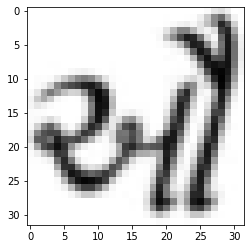

In [10]:
import matplotlib.pyplot as plt

result = vmodel.predict(X_test[50].reshape(-1,32,32,3))
print(result.argmax())

plt.imshow(X_test[50])
plt.show()

10


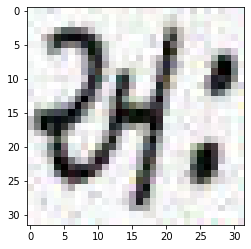

In [12]:
result = vmodel.predict(X_test[744].reshape(-1,32,32,3))
print(result.argmax())

plt.imshow(X_test[744])
plt.show()